# Data Thieves

    - The utilities folder contains our source code

In [8]:
# import our utility functions
from utility import scrapers

import pandas as pd
import matplotlib.pyplot as plt

## Scrape our data :)

In [ ]:
goodreads = scrapers.scrape_goodreads()
nytimes = scrapers.scrape_nytimes()
amazon = scrapers.scrape_amazon()

## Store them as csv files so we can easily import to a database

In [3]:
nytimes.to_csv("data/ny_times.csv" ,index=False)
amazon.to_csv("data/amazon.csv" ,index=False)
goodreads.to_csv("data/goodreads.csv", index=False)

## Check DataFrame contents

In [31]:
nytimes = pd.read_csv("data/ny_times.csv")
nytimes.head()

,title,author,weeks_in_ranking,synopsis,cover_url,common_genre
0,The Vanishing Half,Brit Bennett,1,The lives of twin sisters who run away from a ...,https://s1.nyt.com/du/books/images/97805255362...,Combined Print & E-Book Fiction
1,The Guest List,Lucy Foley,1,A wedding between a TV star and a magazine pub...,https://s1.nyt.com/du/books/images/97800628689...,Combined Print & E-Book Fiction
2,Where The Crawdads Sing,Delia Owens,91,In a quiet town on the North Carolina coast in...,https://s1.nyt.com/du/books/images/97807352190...,Combined Print & E-Book Fiction
3,The Lies That Bind,Emily Giffin,1,When the new man in her life disappears on 9/1...,https://s1.nyt.com/du/books/images/97803991789...,Combined Print & E-Book Fiction
4,Hideaway,Nora Roberts,2,"A child star escapes her abductors, gathers he...",https://s1.nyt.com/du/books/images/97812502071...,Combined Print & E-Book Fiction


In [5]:
amazon = pd.read_csv("data/amazon.csv")
amazon.head()

,rank,title,author,ratings,reviews,price
0,1,The Room Where It Happened: A White House Memoir,John Bolton,0.0,0,19.50
1,2,Too Much And Never Enough: How My Family Creat...,Mary L. Trump Ph.D.,0.0,0,25.20
2,3,How To Be An Antiracist,Ibram X. Kendi,4.7,567,14.79
3,4,White Fragility: Why It'S So Hard For White Pe...,Robin DiAngelo,4.3,1916,11.35
4,5,Stamped From The Beginning: The Definitive His...,Ibram X. Kendi,4.7,649,12.16


In [6]:
goodreads = pd.read_csv("data/goodreads.csv")
goodreads.head()

,rank,title,author,ratings,reviews,reads
0,1,Where The Crawdads Sing,Delia Owens,4.48,783960,38943
1,2,The Ballad Of Songbirds And Snakes (The Hunger...,Suzanne Collins,3.91,59917,36867
2,3,Normal People,Sally Rooney,3.87,299196,36847
3,4,Little Fires Everywhere,Celeste Ng,4.10,613328,29086
4,5,The Silent Patient,Alex Michaelides,4.09,387115,27879


In [32]:
kaggle_goodreads = pd.read_csv("data/kaggle_goodreads.csv")
kaggle_goodreads.head()

,title,author,ratings,reviews
0,"A Long Finish (Aurelio Zen, #6)",Michael Dibdin,3.78,1043
1,"Blood Rain (Aurelio Zen, #7)",Michael Dibdin,3.75,1024
2,"Sizilianisches Finale (Aurelio Zen, #7)",Michael Dibdin,3.75,1024
3,"New Television, Globalisation, and the East As...",Anthony Y. H. Fung,4.00,1
4,Medieval Machine: The Industrial Revolution of...,Jean Gimpel,3.89,222


# Select the common books between the pages

## 1. Amazon and Goodreads common books

In [11]:
amazon_goodreads = pd.merge(goodreads, amazon, on="title", how="inner")
amazon_goodreads

,rank_x,title,author_x,ratings_x,reviews_x,reads,rank_y,author_y,ratings_y,reviews_y,price
0,1,Where The Crawdads Sing,Delia Owens,4.48,783960,38943,8,Delia Owens,4.7,50243,9.59
1,10,Untamed,Glennon Doyle,4.27,45969,17879,14,Glennon Doyle,4.6,2301,16.80
2,14,Becoming,Michelle Obama,4.55,475528,14925,16,Michelle Obama,4.7,35376,11.89


## 2. Amazon and NY Times common books

In [18]:
amazon_nytimes = pd.merge(nytimes, amazon, on="title", how="inner")
amazon_nytimes

,title,author_x,weeks_in_ranking,synopsis,cover_url,common_genre,rank,author_y,ratings,reviews,price
0,Where The Crawdads Sing,Delia Owens,91,In a quiet town on the North Carolina coast in...,https://s1.nyt.com/du/books/images/97807352190...,Combined Print & E-Book Fiction,8,Delia Owens,4.7,50243,9.59
1,So You Want To Talk About Race,Ijeoma Oluo,3,A look at the contemporary racial landscape of...,https://s1.nyt.com/du/books/images/97815800567...,Combined Print & E-Book Nonfiction,6,Ijeoma Oluo,4.7,560,11.36
2,How To Be An Antiracist,Ibram X. Kendi,6,A primer for creating a more just and equitabl...,https://s1.nyt.com/du/books/images/97805255092...,Combined Print & E-Book Nonfiction,3,Ibram X. Kendi,4.7,567,14.79
3,Camino Winds,John Grisham,6,The line between fact and fiction becomes blur...,https://s1.nyt.com/du/books/images/97803855459...,Hardcover Fiction,42,John Grisham,4.1,1332,17.37
4,Untamed,Glennon Doyle,13,The activist and public speaker describes her ...,https://s1.nyt.com/du/books/images/97819848012...,Hardcover Nonfiction,14,Glennon Doyle,4.6,2301,16.80
5,Between The World And Me,Ta-Nehisi Coates,88,Winner of the 2015 National Book Award for non...,https://s1.nyt.com/du/books/images/97806796459...,Hardcover Nonfiction,24,Ta-Nehisi Coates,4.6,5639,13.11
6,Becoming,Michelle Obama,78,The former first lady describes how she balanc...,https://s1.nyt.com/du/books/images/97815247631...,Hardcover Nonfiction,16,Michelle Obama,4.7,35376,11.89


## 3. Goodreads and NY Times common books

In [16]:
goodreads_nytimes = pd.merge(goodreads, nytimes, on="title", how="inner")
goodreads_nytimes

,rank,title,author_x,ratings,reviews,reads,author_y,weeks_in_ranking,synopsis,cover_url,common_genre
0,1,Where The Crawdads Sing,Delia Owens,4.48,783960,38943,Delia Owens,91,In a quiet town on the North Carolina coast in...,https://s1.nyt.com/du/books/images/97807352190...,Combined Print & E-Book Fiction
1,3,Normal People,Sally Rooney,3.87,299196,36847,Sally Rooney,16,The connection between a high school star athl...,https://s1.nyt.com/du/books/images/97819848221...,Paperback Trade Fiction
2,4,Little Fires Everywhere,Celeste Ng,4.10,613328,29086,Celeste Ng,57,An artist with a mysterious past and a disrega...,https://s1.nyt.com/du/books/images/97807352243...,Paperback Trade Fiction
3,10,Untamed,Glennon Doyle,4.27,45969,17879,Glennon Doyle,13,The activist and public speaker describes her ...,https://s1.nyt.com/du/books/images/97819848012...,Hardcover Nonfiction
4,14,Becoming,Michelle Obama,4.55,475528,14925,Michelle Obama,78,The former first lady describes how she balanc...,https://s1.nyt.com/du/books/images/97815247631...,Hardcover Nonfiction
5,23,Circe,Madeline Miller,4.27,285049,11644,Madeline Miller,7,"Zeus banishes Helios' daughter to an island, w...",https://s1.nyt.com/du/books/images/97803165563...,Paperback Trade Fiction
6,35,The Woman In The Window,A.J. Finn,3.94,402231,9661,A.J. Finn,59,A recluse who drinks heavily and takes prescri...,https://s1.nyt.com/du/books/images/97800626784...,Paperback Trade Fiction
7,45,The Guest List,Lucy Foley,3.98,25778,8354,Lucy Foley,1,A wedding between a TV star and a magazine pub...,https://s1.nyt.com/du/books/images/97800628689...,Combined Print & E-Book Fiction


## 4. Top Common Books!

In [34]:
top_common = pd.merge(goodreads_nytimes, amazon_goodreads, on="title", how="inner")
top_common

,rank,title,author_x_x,ratings,reviews,reads_x,author_y_x,weeks_in_ranking,synopsis,cover_url,...,rank_x,author_x_y,ratings_x,reviews_x,reads_y,rank_y,author_y_y,ratings_y,reviews_y,price
0,1,Where The Crawdads Sing,Delia Owens,4.48,783960,38943,Delia Owens,91,In a quiet town on the North Carolina coast in...,https://s1.nyt.com/du/books/images/97807352190...,...,1,Delia Owens,4.48,783960,38943,8,Delia Owens,4.7,50243,9.59
1,10,Untamed,Glennon Doyle,4.27,45969,17879,Glennon Doyle,13,The activist and public speaker describes her ...,https://s1.nyt.com/du/books/images/97819848012...,...,10,Glennon Doyle,4.27,45969,17879,14,Glennon Doyle,4.6,2301,16.80
2,14,Becoming,Michelle Obama,4.55,475528,14925,Michelle Obama,78,The former first lady describes how she balanc...,https://s1.nyt.com/du/books/images/97815247631...,...,14,Michelle Obama,4.55,475528,14925,16,Michelle Obama,4.7,35376,11.89


## 5. Average ratings on top books
    - Amazon vs Goodreads

In [130]:
# create a new dataframe with the reviews from both amazon and goodreads
data = pd.DataFrame({
    "pages": ["Goodreads", "Amazon"],
    "Becoming": [amazon_goodreads["ratings_x"].loc[2], amazon_goodreads["ratings_y"].loc[2]],
    "Untamed": [amazon_goodreads["ratings_x"].loc[1], amazon_goodreads["ratings_y"].loc[1]],
    "Where The Crawdads Sing": [amazon_goodreads["ratings_x"].loc[0], amazon_goodreads["ratings_y"].loc[0]],
})

# check.
data

,pages,Becoming,Untamed,Where The Crawdads Sing
0,Goodreads,4.55,4.27,4.48
1,Amazon,4.70,4.60,4.70


# Difference in reviews count between Amazon and Goodreads

In [99]:
# create a new dataframe with the reviews from both amazon and goodreads
data = pd.DataFrame({
    "pages": ["Amazon", "Goodreads"],
    "reviews": [amazon.agg({"reviews": "sum"})["reviews"],
                goodreads.agg({"reviews": "sum"})["reviews"]]
})

# check.
data.loc()

,pages,reviews
0,Amazon,248926
1,Goodreads,47111910


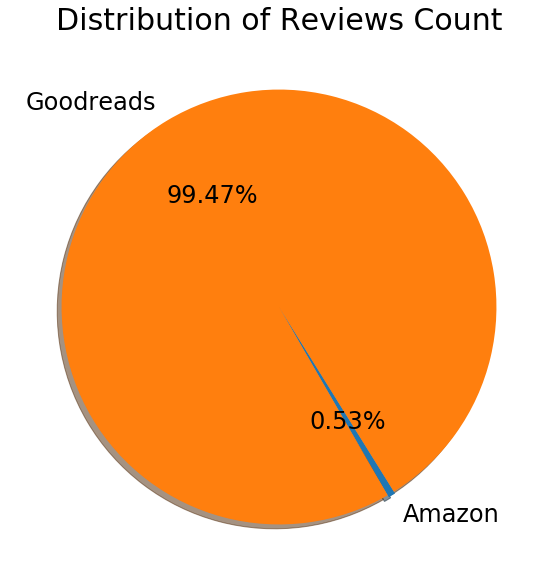

In [123]:
# Create the fig and axes
fig, ax = plt.subplots(figsize=(10,10))

# set title and font size
ax.set_title("Distribution of Reviews Count", fontsize=30)

# plot the chart
pie = (ax.pie(
        data["reviews"],
        explode=(0.01, 0),
        labels=data["pages"],
        autopct="%0.2f%%",
        shadow=True,
        startangle=300,
        textprops={'fontsize': 24}))

# Recommended titles

    - The union of our sets

In [65]:
# 
top = pd.merge(goodreads_nytimes, amazon_goodreads, on="title", how="left")


top = top[["title", "author_x_x", "ratings"]].rename(columns={"author_x_x": "author"})
top.sort_values(by="ratings", ascending=False)

,title,author,ratings
4,Becoming,Michelle Obama,4.55
0,Where The Crawdads Sing,Delia Owens,4.48
3,Untamed,Glennon Doyle,4.27
5,Circe,Madeline Miller,4.27
2,Little Fires Everywhere,Celeste Ng,4.10
7,The Guest List,Lucy Foley,3.98
6,The Woman In The Window,A.J. Finn,3.94
1,Normal People,Sally Rooney,3.87
